# Unsupervised Machine Learning

## KMeans Clustering

Unsupervised machine learning is different from Supervised machine learning in one major way.

> Unsupervised does not include the use of labels for your data.

You may remember in our classification and regression methods we carefully selected the criteria to maximize the effectiveness of our prediction models. This was often referred to as "giving our model both the questions and the answers, because we have more questions we need answers to".

In an unsupervised learning model we either want to perform an ignorant analysis on the data or we do not have the labels available. Why your labels are not available could be any number of reasons but still - we want to figure our "something" with our data.

## Principal Component Analysis (PCA)

The first thing we need to do when we are working with unlabeled data is to pair it down into easily consumable data.  As we will see below in our `iris data`, the original shape is:

> `(150, 4)`

For our purposes we want to be able to plot our data in 2 dimensions (x and y) so we can ask `scikit-learn` to perform our PCA for us and it will pick the `n` most impactful (possibly most corelated) unlabeled features for us to use in our clustering analysis.  By passing an `n_components` of 2, it will reshape our data so it's easier for us to plot.

> `(150, 2)`

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
#from sklearn import preprocessing
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

/Users/taddeimania/Developer/class-notes/Notebooks/week-5/.direnv/python-3.5.0/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
pca = PCA(n_components=2)
pca.fit(X)
reduced_X = pca.transform(X)
print(iris.feature_names)
print("unreduced data shape", X.shape)
print("\nYou don't really want to know what it did to our features")
print("reduced data shape", reduced_X.shape)

for component in pca.components_:
    print("\n")
    print(" + ".join("{} * {}".format(value, name) for value, name in zip(component, iris.feature_names)))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
unreduced data shape (150, 4)

You don't really want to know what it did to our features


0.36158967738144937 * sepal length (cm) + -0.08226888989221426 * sepal width (cm) + 0.856572105290528 * petal length (cm) + 0.3588439262482155 * petal width (cm)


-0.6565398832858313 * sepal length (cm) + -0.7297123713264961 * sepal width (cm) + 0.17576740342865427 * petal length (cm) + 0.07470647013503312 * petal width (cm)


### Pandas why not?

Because we all love pandas, lets take a look at our original and reduced data.

In [13]:
import pandas as pd
print(pd.DataFrame(X).head())
print(pd.DataFrame(reduced_X).head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
          0         1
0 -2.684207 -0.326607
1 -2.715391  0.169557
2 -2.889820  0.137346
3 -2.746437  0.311124
4 -2.728593 -0.333925


Oof! What happened?

Well our `PCA` found a common relation between all 4 columns and applied that to them in order to reduce our amount of features down to two.  Voodoo? I think so!

### Visualizing

Okay so we've got our "iris data" broken down into 2 features, lets see the X and the Y plotted.

<!--
plt.figure(figsize=(8, 6))
plt.scatter(reduced_X[:,0], reduced_X[:,1])
plt.title("Iris dataset with ?? clusters")
plt.show()
-->

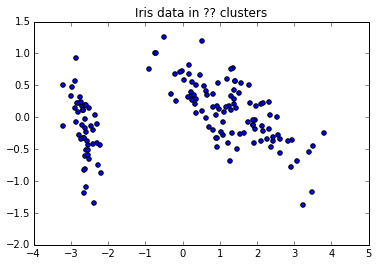

In [144]:
plt.scatter(reduced_X[:, 0], reduced_X[:, 1])
plt.title("Iris data in ?? clusters")
plt.show()

Interesting... Visually I can see 2 clearly defined clusters.  But what do we do when our superior asks me to provide 3 defined clusters to her?  What about 4 -> n clusters?

Well we ask `scikit-learn` to do our work for us that's how.

Notice that with unsupervised learning we do NOT provide any Y labels to the `.fit()`.  This is because it will attempt to figure out our labels for us.  More voodoo magic? I'll let you decide.

Also the `.predict()` method merely provides a list of integers that represent which cluster each element belongs to.

<!--
from sklearn.cluster import KMeans

kmeans = KMeans(3)
kmeans.fit(reduced_X)
y_pred = kmeans.predict(reduced_X)
print(y_pred)
-->

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
y_pred = kmeans.fit_predict(reduced_X)

In [28]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Basically every number in the above array is associated with an X and Y plot point on our graph (by index).  This way we can assign our `y_pred` array to our `c` kwarg for our scatter plot.

We can even zip the `reduced_X` with our `y_pred` variables to generate a report of item locations and their associated cluster. Neat eh?  Goooooo Pandas!

<!--
pd.DataFrame(list(zip(reduced_X, y_pred)), columns=["Location (X, Y)", "Cluster"]).head()
-->

In [29]:
list(zip(reduced_X, y_pred))[:10]

[(array([-2.68420713, -0.32660731]), 0),
 (array([-2.71539062,  0.16955685]), 0),
 (array([-2.88981954,  0.13734561]), 0),
 (array([-2.7464372 ,  0.31112432]), 0),
 (array([-2.72859298, -0.33392456]), 0),
 (array([-2.27989736, -0.74778271]), 0),
 (array([-2.82089068,  0.08210451]), 0),
 (array([-2.62648199, -0.17040535]), 0),
 (array([-2.88795857,  0.57079803]), 0),
 (array([-2.67384469,  0.1066917 ]), 0)]

When we put our `y_pred` as your `c` keyword argument into our plot we can see our clusters illustrated.

<!--
plt.figure(figsize=(8, 6))
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=y_pred, cmap="RdYlBu")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], alpha=.5, s=250)
plt.title("Iris dataset with 3 clusters")
plt.show()
-->

/Users/taddeimania/Developer/class-notes/Notebooks/week-5/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


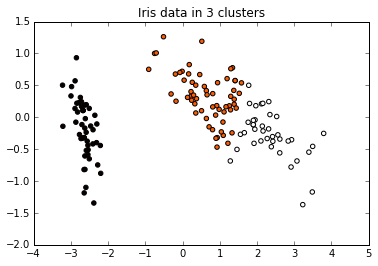

In [30]:
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y_pred, cmap="hot")
plt.title("Iris data in 3 clusters")
plt.show()

### Clustering random data - because why not?

In [31]:
import numpy as np

First lets generate 3 sets of "kind of" clustered data.

In [42]:
x1 = np.random.normal(0.5, 0.5, 50)
y1 = np.random.normal(1.5, 0.5, 50)

x2 = np.random.normal(1.5, 0.5, 50)
y2 = np.random.normal(0.5, 0.5, 50)

x3 = np.random.normal(1.5, 0.5, 50)
y3 = np.random.normal(1.5, 0.5, 50)

/Users/taddeimania/Developer/class-notes/Notebooks/week-5/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


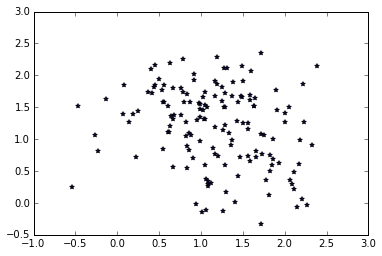

In [43]:
plt.scatter(x1, y1, marker="*")
plt.scatter(x2, y2, marker="*")
plt.scatter(x3, y3, marker="*")

In [44]:
c1 = np.column_stack((x1, y1))
c2 = np.column_stack((x2, y2))
c3 = np.column_stack((x3, y3))

data = np.vstack((c1, c2, c3))

[[ 0.48228501  1.610015  ]
 [ 1.87808415  0.54620631]
 [ 0.94654887  0.56308467]
 [ 1.40384715  1.61269859]]


/Users/taddeimania/Developer/class-notes/Notebooks/week-5/.direnv/python-3.5.0/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


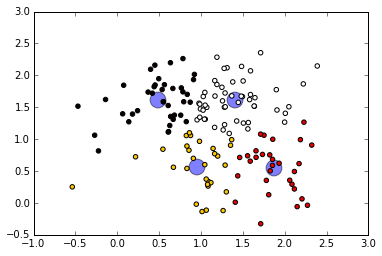

In [46]:
kmeans2 = KMeans(4)
labels = kmeans2.fit_predict(data)
print(kmeans2.cluster_centers_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], alpha=.5, s=250)
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="hot")

## Exercise

Reduce image to 16 colors using clustering.

It may seem impossible but we can use KMeans clustering to "downsample" an image.

Downsampling an image is the process of taking an image at it's current color depth (maybe 256, or millions of colors) and reducing it to whatever you want to reduce it down to.

In our case we want to go down to 8 colors.  This will make our image look like it's something from a game being played on DOS in somewhere between CGA and VGA graphics mode.

In [47]:
from PIL import Image
from IPython.display import Image as IPythonImage
import numpy as np

im = Image.open("bird_small.jpg")
imdata = np.asarray(im)

ImportError: No module named 'PIL'

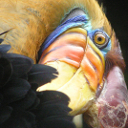

In [108]:
IPythonImage('bird_small.jpg')

Lets look at the shape of our `imdata`.  What can we learn from the shape?

<!--
print(imdata.shape)
-->

In [179]:
imdata.shape

(128, 128, 3)

In order to work with this in a managable way we need to do our own form of PCA by breaking it down into two features.

<!---
all_pixels = imdata.reshape(-1, 3).astype(np.float)
--->

In [177]:
all_pixels = imdata.reshape(-1, 3).astype(np.float)
all_pixels

array([[ 219.,  180.,  103.],
       [ 230.,  185.,  117.],
       [ 225.,  186.,  109.],
       ..., 
       [  64.,   43.,   38.],
       [  56.,   36.,   37.],
       [  52.,   39.,   33.]])

Just like before, lets instantiate our KMeans model and fit our pixel data to it.

What will this give us back?  It will give us our pixel groups!  When we fit and predict our pixel data with KMeans it will actually find clusters of alike colored pixels and group them together.  Since we want 8 colors we will set our `k = 8` so as to not get too deep of a color sample.

<!--
kmeans = KMeans(8)
kmeans.fit(all_pixels)
pixel_groups = kmeans.predict(all_pixels)
-->

In [216]:
kmeans3 = KMeans(2)
pixel_groups = kmeans3.fit_predict(all_pixels)

Let's take a peek at the pixel groups:

In [217]:
pixel_groups

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Now that we have our pixel groups, we can grab our colors by just asking our model for the cluster centers.  It seems weird but trust me - it is giving us back our red, green, and blue values of the pixels.

<!--
new_colors = kmeans.cluster_centers_.astype(np.int)
new_colors
-->

In [218]:
color_group = kmeans3.cluster_centers_.astype(np.int)

Now that we have our pixel groups and our color groups, it's a pretty easy step to create a new array of pixel colors for every group given the color groupings from above!

Lets make a list comprehension and give it to an np.array

<!--
new_pixels = np.array([new_colors[c] for c in pixel_groups])
-->

In [219]:
new_pixels = np.array([color_group[x] for x in pixel_groups]).reshape(128, 128, 3)

Reshaping the data back to it's original dimensions will allow us to easily reconstruct our image with scipy and save it to our hard drive.

In [220]:
import scipy
scipy.misc.imsave('bird_small_resample_LIVE_CODE_722.jpg', new_image_data)

This bird looks creepy.

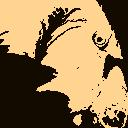

In [221]:
IPythonImage('bird_small_resample_LIVE_CODE_722.jpg')

In [231]:
def downsample_image(num_colors):
    im = Image.open("bird_small.jpg")
    imdata = np.asarray(im)
    all_pixels = imdata.reshape(-1, 3).astype(np.float)
    kmeans3 = KMeans(num_colors)
    pixel_groups = kmeans3.fit_predict(all_pixels)
    color_group = kmeans3.cluster_centers_.astype(np.int)
    new_pixels = np.array([color_group[x] for x in pixel_groups]).reshape(128, 128, 3)
    scipy.misc.imsave('bird_small_resample_LIVE_CODE_122.jpg', new_pixels)


In [242]:
downsample_image(300)

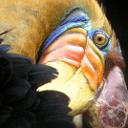

In [243]:
IPythonImage('bird_small_resample_LIVE_CODE_122.jpg')

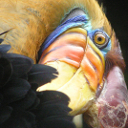

In [244]:
IPythonImage('bird_small.jpg')